In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = yf.download(['BTC-USD','ETH-USD','SOL-USD','SPY','GLD','TLT'])['Close']

[*********************100%***********************]  6 of 6 completed


In [ ]:
pesos = [1/6]*6
pesos = np.array(pesos)

In [ ]:
df = df.pct_change()
df.dropna(inplace = True)

In [ ]:
df['Cartera'] = df.dot(pesos)
df.columns=(['BTC','ETH','GLD','SOL','SPY','TLT','Cartera'])

In [ ]:
retornos = (1+df).cumprod()

In [ ]:
sharpe = df.mean()/df.std()

In [ ]:
s = pd.DataFrame(sharpe)
s

,0
BTC,0.069788
ETH,0.088388
GLD,0.018120
SOL,0.097877
SPY,0.057976
TLT,-0.055531
Cartera,0.104488


In [ ]:
s = s.transpose()

In [ ]:
std = round(df.std()*100,2)
std = pd.DataFrame(std).transpose()
mean = round(df.mean()*100,2)
mean = pd.DataFrame(mean).transpose()
std

,BTC,ETH,GLD,SOL,SPY,TLT,Cartera
0,3.68,4.82,0.79,8.3,0.96,0.78,2.43


El desvio de los Activos es 
%    BTC   ETH   GLD  SOL   SPY   TLT  Cartera
0  3.68  4.82  0.79  8.3  0.96  0.78     2.43 
 la media de los activos es 
 %    BTC   ETH   GLD   SOL   SPY   TLT  Cartera
0  0.26  0.43  0.01  0.81  0.06 -0.04     0.25


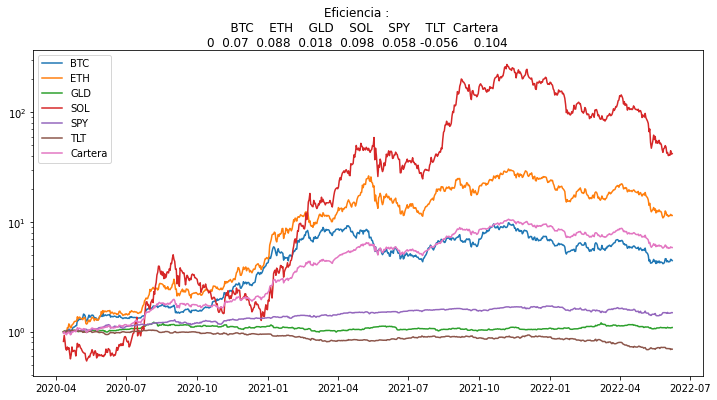

In [ ]:
fig,ax = plt.subplots(figsize=(12,6))
ax.plot(retornos)
ax.set_yscale('log')

ax.legend(retornos)
plt.suptitle('Eficiencia :\n'+str(round(s,3)))
print(f'El desvio de los Activos es \n%{std} \n la media de los activos es \n %{mean}')

In [ ]:
df.describe()

,BTC,ETH,GLD,SOL,SPY,TLT,Cartera
count,78900.000000,78900.000000,78900.000000,78900.000000,78900.000000,78900.000000,78900.000000
mean,0.256489,0.425981,0.014399,0.812744,0.055370,-0.043264,0.253620
std,3.675271,4.819430,0.794632,8.303752,0.955055,0.779096,2.427258
min,-13.766123,-27.200349,-5.369441,-37.208768,-5.764895,-3.418260,-13.101787
25%,-1.537537,-2.088555,-0.192692,-3.864729,-0.176598,-0.367578,-1.144867
50%,0.247771,0.496934,0.000000,0.151826,0.000000,0.000000,0.320673
75%,2.038007,3.080594,0.362599,4.999898,0.439758,0.249774,1.680890
max,18.746474,25.947533,2.735900,47.282785,3.045969,3.305906,10.818275
